#  ÌîÑÎ°úÏ†ùÌä∏: Îçî Î©ãÏßÑ Î≤àÏó≠Í∏∞ ÎßåÎì§Í∏∞

# Step 1. Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú (Î°úÏª¨ Ïú†Ï†ÄÏö©)
ÏïÑÎûò ÎßÅÌÅ¨ÏóêÏÑú¬†**`korean-english-park.train.tar.gz`**¬†Î•º Îã§Ïö¥Î°úÎìúÎ∞õÏïÑ ÌïúÏòÅ Î≥ëÎ†¨ Îç∞Ïù¥ÌÑ∞Î•º ÌôïÎ≥¥Ìï©ÎãàÎã§.

- [jungyeul/korean-parallel-corpora](https://github.com/jungyeul/korean-parallel-corpora/tree/master/korean-english-news-v1)

*üí°Ïù¥Ï†Ñ [ Seq2seqÏúºÎ°ú Î≤àÏó≠Í∏∞ ÎßåÎì§Í∏∞ ] ÏΩîÏä§ÏóêÏÑú ÏÇ¨Ïö©Ìïú Îç∞Ïù¥ÌÑ∞ÏôÄ ÎèôÏùºÌïú Îç∞Ïù¥ÌÑ∞ÏûÖÎãàÎã§!*

ÌÑ∞ÎØ∏ÎÑêÏùÑ Ïó¥Ïñ¥ÏÑú ÌïòÎã®Ïùò Î™ÖÎ†πÏñ¥Î•º ÏûÖÎ†•Ìï¥Ï£ºÏãúÎ©¥ Îê©ÎãàÎã§.
```
$ mkdir -p ~/aiffel/transformer/data
$ cd ~/aiffel/transformer/data

$ wget https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz
$ gzip -d korean-english-park.train.tar.gz
$ tar -xvf korean-english-park.train.tar

```

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import re
import os
import io
import time
import random

import seaborn # Attention ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ ÌïÑÏöî!

print(tf.__version__)

2.4.1


# **Step 2. Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú Î∞è ÌÜ†ÌÅ∞Ìôî**

---

1)¬†**`set`**¬†Îç∞Ïù¥ÌÑ∞ÌòïÏù¥¬†**Ï§ëÎ≥µÏùÑ ÌóàÏö©ÌïòÏßÄ ÏïäÎäîÎã§Îäî Í≤ÉÏùÑ ÌôúÏö©**Ìï¥ Ï§ëÎ≥µÎêú Îç∞Ïù¥ÌÑ∞Î•º Ï†úÍ±∞ÌïòÎèÑÎ°ù Ìï©ÎãàÎã§. Îç∞Ïù¥ÌÑ∞Ïùò¬†**Î≥ëÎ†¨ ÏåçÏù¥ ÌùêÌä∏Îü¨ÏßÄÏßÄ ÏïäÍ≤å Ï£ºÏùò**ÌïòÏÑ∏Ïöî! Ï§ëÎ≥µÏùÑ Ï†úÍ±∞Ìïú Îç∞Ïù¥ÌÑ∞Î•º¬†**`cleaned_corpus`**¬†Ïóê Ï†ÄÏû•Ìï©ÎãàÎã§.

In [2]:
data_dir = os.getenv('HOME')+'/aiffel/transformer/data'
kor_path = data_dir+"/korean-english-park.train.ko"
eng_path = data_dir+"/korean-english-park.train.en"

# Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú Î∞è ÌÜ†ÌÅ∞Ìôî
def clean_corpus(kor_path, eng_path):
    with open(kor_path, "r") as f: kor = f.read().splitlines()
    with open(eng_path, "r") as f: eng = f.read().splitlines()
    assert len(kor) == len(eng)
    
    cleaned_corpus = list(set(zip(kor,eng)))

    

    return cleaned_corpus

cleaned_corpus = clean_corpus(kor_path, eng_path)

In [3]:
len(cleaned_corpus)

78968

In [4]:
cleaned_corpus[1]

('ÏµúÍ∑º Îã§ÏûÑÌÅ¨ÎùºÏù¥Ïä¨Îü¨Ïùò Ìï©Î≥ë ÏÜåÏãùÏù¥ Ï†ÑÌï¥ÏßÄÎ©¥ÏÑú Îâ¥Ïöï Ï£ºÏãùÏãúÏû•ÏóêÏÑúÎäî Îã§ÏûÑÌÅ¨ÎùºÏù¥Ïä¨Îü¨Ïùò Ï£ºÏãù Í±∞ÎûòÎüâÏù¥ ÏµúÍ∑º 3Í∞úÏõîÍ∞Ñ 30% Ïù¥ÏÉÅ ÎäòÏñ¥ÎÇ¨Îã§.',
 'Even coming off the highs of the day, shares of the company have risen nearly 30 percent in the three months since it announced it was looking to sell Chrysler.')

In [5]:
cleaned_corpus[78967]

('3Î∂ÑÏùò2Í∞Ä Ï§ëÎèôÏù∏Îì§Ïù∏ Í¥ÄÍ∞ùÎì§ÏùÄ Ìè≠ÏÜåÎ•º ÌÑ∞Îú®Î†∏Îã§',
 'The audience, two-thirds of Mideast descent, explodes in laughter.')

2) Ï†ïÏ†ú Ìï®ÏàòÎ•º ÏïÑÎûò Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÍ≤å Ï†ïÏùòÌïòÏÑ∏Ïöî.

> Ï°∞Í±¥Î™®Îì† ÏûÖÎ†•ÏùÑ¬†ÏÜåÎ¨∏ÏûêÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§.ÏïåÌååÎ≤≥, Î¨∏Ïû•Î∂ÄÌò∏, ÌïúÍ∏ÄÎßå ÎÇ®Í∏∞Í≥† Î™®Îëê Ï†úÍ±∞Ìï©ÎãàÎã§.Î¨∏Ïû•Î∂ÄÌò∏ ÏñëÏòÜÏóê Í≥µÎ∞±ÏùÑ Ï∂îÍ∞ÄÌï©ÎãàÎã§.Î¨∏Ïû• ÏïûÎí§Ïùò¬†Î∂àÌïÑÏöîÌïú Í≥µÎ∞±ÏùÑ Ï†úÍ±∞Ìï©ÎãàÎã§.

In [6]:
def preprocess_sentence(sentence, s_token=False, e_token=False):
    sentence = sentence.lower().strip()

    sentence = re.sub(r"([?.!,])", r" \1 ", sentence) ## [?.!,]Î¨∏ÏûêÎäî ÏñëÏ™ΩÎùÑÏñ¥Ïì∞Í∏∞ÌïòÍ≥† Í≥µÎ∞±Ï†ÅÏö©ÌïòÍ∏∞
    sentence = re.sub(r'[" "]+', " ", sentence)
    #ÌïúÍ∏Ä Ìè¨Ìï®
    sentence = re.sub(r"[^a-zA-Z|0-9|„Ñ±-Ìïò-„Ö£Í∞Ä-Ìû£?.!,]+", " ", sentence)

    sentence = sentence.strip()
        
    return sentence

3) ÌïúÍ∏Ä ÎßêÎ≠âÏπò¬†**`kor_corpus`**¬†ÏôÄ ÏòÅÎ¨∏ ÎßêÎ≠âÏπò¬†**`eng_corpus`**¬†Î•º Í∞ÅÍ∞Å Î∂ÑÎ¶¨Ìïú ÌõÑ,¬†**Ï†ïÏ†úÌïòÏó¨ ÌÜ†ÌÅ∞ÌôîÎ•º ÏßÑÌñâ**Ìï©ÎãàÎã§!¬†**ÌÜ†ÌÅ∞ÌôîÏóêÎäî¬†*Sentencepiece*Î•º ÌôúÏö©**ÌïòÏÑ∏Ïöî. Ï≤®Î∂ÄÎêú Í≥µÏãù ÏÇ¨Ïù¥Ìä∏Î•º Ï∞∏Í≥†Ìï¥ ÏïÑÎûò Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÎäî¬†**`generate_tokenizer()`**¬†Ìï®ÏàòÎ•º Ï†ïÏùòÌï©ÎãàÎã§. ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú¬†**`ko_tokenizer`**¬†Í≥º¬†**`en_tokenizer`**¬†Î•º ÏñªÏúºÏÑ∏Ïöî.¬†**`en_tokenizer`**ÏóêÎäî¬†**`set_encode_extra_options("bos:eos")`**¬†Ìï®ÏàòÎ•º Ïã§ÌñâÌï¥¬†**ÌÉÄÍ≤ü ÏûÖÎ†•Ïù¥ Î¨∏Ïû•Ïùò ÏãúÏûë ÌÜ†ÌÅ∞Í≥º ÎÅù ÌÜ†ÌÅ∞ÏùÑ Ìè¨Ìï®Ìï† Ïàò ÏûàÍ≤å**¬†Ìï©ÎãàÎã§.

> Ï°∞Í±¥Îã®Ïñ¥ ÏÇ¨Ï†ÑÏùÑ Îß§Í∞úÎ≥ÄÏàòÎ°ú Î∞õÏïÑ¬†ÏõêÌïòÎäî ÌÅ¨Í∏∞Ïùò ÏÇ¨Ï†ÑÏùÑ Ï†ïÏùòÌï† Ïàò ÏûàÍ≤å Ìï©ÎãàÎã§.¬†(Í∏∞Î≥∏: 20,000)ÌïôÏäµ ÌõÑ Ï†ÄÏû•Îêú¬†model¬†ÌååÏùºÏùÑ¬†SentencePieceProcessor()¬†ÌÅ¥ÎûòÏä§Ïóê¬†Load()Ìïú ÌõÑ Î∞òÌôòÌï©ÎãàÎã§.ÌäπÏàò ÌÜ†ÌÅ∞Ïùò Ïù∏Îç±Ïä§Î•º ÏïÑÎûòÏôÄ ÎèôÏùºÌïòÍ≤å ÏßÄÏ†ïÌï©ÎãàÎã§.<PAD>¬†:¬†0¬†/¬†<BOS>¬†:¬†1¬†/¬†<EOS>¬†:¬†2¬†/¬†<UNK>¬†:¬†3

- Ï∞∏Í≥†:¬†[google/sentencepiece](https://github.com/google/sentencepiece)

## kor_corpus ÏôÄ eng_corpus ÎßåÎì§Í∏∞

In [7]:
kor_corpus = []
eng_corpus = []

for tmp in cleaned_corpus:
    tmp_ko = preprocess_sentence(tmp[0])
    tmp_en = preprocess_sentence(tmp[1], s_token=True, e_token=True)
    #if len(tmp_ko) <= 40:
    kor_corpus.append(tmp_ko)
    eng_corpus.append(tmp_en)

print(len(kor_corpus))
print(len(eng_corpus))
print("Korean:", kor_corpus[100])   
print("English:", eng_corpus[100])

78968
78968
Korean: Ïù¥Îì§ÏùÄ ÏÑ†Íµê Î∞è ÏûêÏõê Î¥âÏÇ¨ Ï∞® Î∞©Î¨∏Ìïú Í∏∞ÎèÖÍµêÏù∏Îì§Ïù∏ Í≤ÉÏúºÎ°ú Î≥¥ÎèÑÎêòÏóàÎã§ .
English: they are reported to be christians on an evangelical and aid mission .


## SentencepieceÎ•º ÌôúÏö©ÌïòÏó¨ ÌïôÏäµÌïú tokenizerÎ•º ÏÉùÏÑ±
- [GD_NLP_02 Ï∞∏Ï°∞](https://github.com/SIMYJ/NLP_Projects/blob/master/%5BGD_NLP_02%5DSentencePiece_Mecab.ipynb)

**1. ÌïúÍµ≠Ïñ¥,ÏòÅÏñ¥ ÏΩîÌçºÏä§ÎßåÎì¨** 
 - Í≤ΩÎ°ú: aiffel/transformer/data/spm/ 
 
**2. ÏΩîÌçºÏä§ Ï†ïÎ≥¥Î•º Î∞òÏòÅÌïòÏó¨ sentencepieceÎ™®Îç∏ ÏÉùÏÑ±**
 - pm_GD10_ko.model , pm_GD10_en.model
 
**3. Îã®Ïñ¥ÏÇ¨Ï†ÑÎèÑ ÏÉùÏÑ±** 
- pm_GD10_ko.vocab , pm_GD10_en.vocab


In [8]:
import sentencepiece as spm
import os


# SentencepieceÎ•º ÌôúÏö©ÌïòÏó¨ ÌïôÏäµÌïú tokenizerÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
def generate_tokenizer(corpus,
                        vocab_size,
                        lang="ko",
                        pad_id=0,
                        bos_id=1,
                        eos_id=2,
                        unk_id=3):
    
    model_name= 'spm_GD10_'+lang
    
    # [[YOUR CODE]]
    ##Î™®Îç∏ ÏÉùÏÑ± Í≤ΩÎ°ú
    temp_file = os.getenv('HOME')+'/aiffel/transformer/data/spm/GD10_'+lang+'.ko'

    # Ìï®Ïàò ÌååÎùºÎØ∏ÌÑ∞ langÏùò Îã®Ïñ¥Î•º Ï†ÅÏö©Ìïú ÌååÏùº ÏΩîÌçºÏä§ ÌååÏùº ÎßåÎì¨
    with open(temp_file, 'w') as f:
        for row in corpus:   # lang corpusÎ•º ÌôúÏö©Ìï©ÎãàÎã§.
            f.write(str(row) + '\n')
    
    spm.SentencePieceTrainer.Train(
         '\
        --input={} \
        --model_prefix={} \
        --vocab_size={} \
        --pad_id={} \
        --bos_id={} \
        --eos_id={} \
        --unk_id={}'.format(temp_file, model_name, vocab_size, pad_id, bos_id, eos_id, unk_id)    
    )
    #ÏúÑ TrainÏóêÏÑú  --model_type = 'unigram'Ïù¥ ÎîîÌè¥Ìä∏ Ï†ÅÏö©ÎêòÏñ¥ ÏûàÏäµÎãàÎã§. --model_type = 'bpe' Î°ú ÏòµÏÖòÏùÑ Ï£ºÏñ¥ Î≥ÄÍ≤ΩÌï† Ïàò ÏûàÏäµÎãàÎã§.
    
    tokenizer = spm.SentencePieceProcessor()
    tokenizer.Load(model_name+'.model')
    
    return tokenizer

In [9]:
SRC_VOCAB_SIZE = TGT_VOCAB_SIZE = 6000


ko_tokenizer = generate_tokenizer(kor_corpus, SRC_VOCAB_SIZE, "ko")
en_tokenizer = generate_tokenizer(eng_corpus, TGT_VOCAB_SIZE, "en")
en_tokenizer.set_encode_extra_options("bos:eos")

True

**ÌååÏùº ÌôïÏù∏Ìï¥Î≥¥Í∏∞** 

In [10]:
!ls -l spm_GD10_ko*

-rw-r--r-- 1 aiffel-dj60 aiffel-dj60 339294  5Ïõî  4 09:56 spm_GD10_ko.model
-rw-r--r-- 1 aiffel-dj60 aiffel-dj60 106963  5Ïõî  4 09:56 spm_GD10_ko.vocab


In [11]:
!ls -l spm_GD10_en*

-rw-r--r-- 1 aiffel-dj60 aiffel-dj60 339197  5Ïõî  4 09:56 spm_GD10_en.model
-rw-r--r-- 1 aiffel-dj60 aiffel-dj60 106838  5Ïõî  4 09:56 spm_GD10_en.vocab


In [12]:
my_corpus = ['ÎÇòÎäî Î∞•ÏùÑ Î®πÏóàÏäµÎãàÎã§.', 'Í∑∏Îü¨ÎÇò Ïó¨Ï†ÑÌûà „Ö†„Ö† Î∞∞Í∞Ä Í≥†ÌîïÎãàÎã§...']

ko_tokenizer

<sentencepiece.SentencePieceProcessor; proxy of <Swig Object of type 'sentencepiece::SentencePieceProcessor *' at 0x7f88c96a8f00> >

4) ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ•º ÌôúÏö©Ìï¥¬†ÌÜ†ÌÅ∞Ïùò Í∏∏Ïù¥Í∞Ä 50 Ïù¥ÌïòÏù∏ Îç∞Ïù¥ÌÑ∞Î•º ÏÑ†Î≥ÑÌïòÏó¨¬†src_corpus¬†ÏôÄ¬†tgt_corpus¬†Î•º Í∞ÅÍ∞Å Íµ¨Ï∂ïÌïòÍ≥†, ÌÖêÏÑú¬†enc_train¬†Í≥º¬†dec_train¬†ÏúºÎ°ú Î≥ÄÌôòÌïòÏÑ∏Ïöî! (‚ùóÎ™®Îì† Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©Ìï† Í≤ΩÏö∞ ÌïôÏäµÏóê ÍµâÏû•Ìûà Ïò§Îûú ÏãúÍ∞ÑÏù¥ Í±∏Î¶ΩÎãàÎã§.)

**SentencepiceÎ™®Îç∏**    
https://wikidocs.net/86657
- encode_as_pieces : Î¨∏Ïû•ÏùÑ ÏûÖÎ†•ÌïòÎ©¥ ÏÑúÎ∏å ÏõåÎìú ÏãúÌÄÄÏä§Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
- encode_as_ids : Î¨∏Ïû•ÏùÑ ÏûÖÎ†•ÌïòÎ©¥ Ï†ïÏàò ÏãúÌÄÄÏä§Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.

In [13]:
len(kor_corpus)

78968

In [14]:
token_ko = ko_tokenizer.encode_as_ids(kor_corpus[1])
token_en = en_tokenizer.encode_as_ids(eng_corpus[1])
       
    
token = list(zip(token_ko,token_en))
    

In [15]:
from tqdm import tqdm_notebook    # Process Í≥ºÏ†ïÏùÑ Î≥¥Í∏∞ ÏúÑÌï¥

src_corpus = []
tgt_corpus = []

assert len(kor_corpus) == len(eng_corpus)


# ÌÜ†ÌÅ∞Ïùò Í∏∏Ïù¥Í∞Ä 50 Ïù¥ÌïòÏù∏ Î¨∏Ïû•Îßå ÎÇ®ÍπÅÎãàÎã§.
for idx in tqdm_notebook(range(len(kor_corpus))):
    token_ko = ko_tokenizer.encode_as_ids(kor_corpus[idx])
    token_en = en_tokenizer.encode_as_ids(eng_corpus[idx])
       
        
    if len(token_ko) <= 50  and len(token_en) <= 50:
        src_corpus.append(token_ko)
        tgt_corpus.append(token_en)

        
print(len(src_corpus))
print(len(tgt_corpus))
print("Korean:", src_corpus[10])   
print("English:", tgt_corpus[10])

/home/aiffel-dj60/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


  0%|          | 0/78968 [00:00<?, ?it/s]

61747
61747
Korean: [854, 8, 154, 3602, 3274, 192, 542, 795, 428, 317, 346, 2973, 23, 3978, 1022, 6, 61, 4960, 90, 52, 6, 4004, 507, 15, 277, 4, 5]
English: [1, 234, 1527, 138, 6, 4790, 9, 623, 1305, 1953, 11, 230, 2880, 21, 647, 14, 1386, 16, 465, 6, 4, 8, 129, 11, 5, 663, 9, 325, 7, 2]


In [16]:
        # Ìå®Îî©Ï≤òÎ¶¨Î•º ÏôÑÎ£åÌïòÏó¨ ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞Î•º ÏôÑÏÑ±Ìï©ÎãàÎã§.

enc_train = tf.keras.preprocessing.sequence.pad_sequences(src_corpus, padding='post')
dec_train = tf.keras.preprocessing.sequence.pad_sequences(tgt_corpus, padding='post')

In [17]:
print(enc_train.shape)
print(dec_train.shape)



(61747, 50)
(61747, 50)


### **Step 3. Î™®Îç∏ ÏÑ§Í≥Ñ**

---

Ïò§Îäò Î∞∞Ïö¥ ÎÇ¥Ïö©ÏùÑ ÌôúÏö©Ìï¥ÏÑú¬†**`Transformer`**¬†Î™®Îç∏ÏùÑ ÏÑ§Í≥ÑÌï¥Î≥¥ÏÑ∏Ïöî!

In [18]:
def positional_encoding(pos, d_model):
    def cal_angle(position, i):
        return position / np.power(10000, int(i) / d_model)

    def get_posi_angle_vec(position):
        return [cal_angle(position, i) for i in range(d_model)]

    sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(pos)])

    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])

    return sinusoid_table

print("Ïäù=3")


Ïäù=3


**Multi-Head Attention**

![](https://aiffelstaticprd.blob.core.windows.net/media/original_images/GN-5-L-8.jpg)

In [19]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        self.depth = d_model // self.num_heads

        self.W_q = tf.keras.layers.Dense(d_model)
        self.W_k = tf.keras.layers.Dense(d_model)
        self.W_v = tf.keras.layers.Dense(d_model)

        self.linear = tf.keras.layers.Dense(d_model)

    def scaled_dot_product_attention(self, Q, K, V, mask):
        d_k = tf.cast(K.shape[-1], tf.float32)
        QK = tf.matmul(Q, K, transpose_b=True)

        scaled_qk = QK / tf.math.sqrt(d_k)

        if mask is not None: scaled_qk += (mask * -1e9)  

        attentions = tf.nn.softmax(scaled_qk, axis=-1)
        out = tf.matmul(attentions, V)

        return out, attentions


    def split_heads(self, x):
        bsz = x.shape[0]
        split_x = tf.reshape(x, (bsz, -1, self.num_heads, self.depth))
        split_x = tf.transpose(split_x, perm=[0, 2, 1, 3])

        return split_x

    def combine_heads(self, x):
        bsz = x.shape[0]
        combined_x = tf.transpose(x, perm=[0, 2, 1, 3])
        combined_x = tf.reshape(combined_x, (bsz, -1, self.d_model))

        return combined_x


    def call(self, Q, K, V, mask):
        WQ = self.W_q(Q)
        WK = self.W_k(K)
        WV = self.W_v(V)

        WQ_splits = self.split_heads(WQ)
        WK_splits = self.split_heads(WK)
        WV_splits = self.split_heads(WV)

        out, attention_weights = self.scaled_dot_product_attention(
            WQ_splits, WK_splits, WV_splits, mask)

        out = self.combine_heads(out)
        out = self.linear(out)

        return out, attention_weights

**Position-wise Feed-Forward Network**

![](https://aiffelstaticprd.blob.core.windows.net/media/original_images/GN-5-L-17.jpg)

In [20]:
class PoswiseFeedForwardNet(tf.keras.layers.Layer):
    def __init__(self, d_model, d_ff):
        super(PoswiseFeedForwardNet, self).__init__()
        self.w_1 = tf.keras.layers.Dense(d_ff, activation='relu')
        self.w_2 = tf.keras.layers.Dense(d_model)

    def call(self, x):
        out = self.w_1(x)
        out = self.w_2(out)
            
        return out

print("Ïäù=3")

Ïäù=3


**Î™®Îìà Ï°∞Î¶ΩÌïòÍ∏∞**

**Encoder Î†àÏù¥Ïñ¥ Íµ¨ÌòÑÌïòÍ∏∞**

In [21]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, n_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()

        self.enc_self_attn = MultiHeadAttention(d_model, n_heads)
        self.ffn = PoswiseFeedForwardNet(d_model, d_ff)

        self.norm_1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.do = tf.keras.layers.Dropout(dropout)
        
    def call(self, x, mask):

        """
        Multi-Head Attention
        """
        residual = x
        out = self.norm_1(x)
        out, enc_attn = self.enc_self_attn(out, out, out, mask)
        out = self.do(out)
        out += residual
        
        """
        Position-Wise Feed Forward Network
        """
        residual = out
        out = self.norm_2(out)
        out = self.ffn(out)
        out = self.do(out)
        out += residual
        
        return out, enc_attn

print("Ïäù=3")


Ïäù=3


**Decoder Î†àÏù¥Ïñ¥ Íµ¨ÌòÑÌïòÍ∏∞**     
Ï∞∏Í≥†: DecoderÏóêÏÑúÎäî Îëê Î≤àÏùò AttentionÏù¥ ÏßÑÌñâÎêòÎãà Î∞òÌôòÎêòÎäî AttentionÎèÑ Îëê Í∞úÍ≤†Ï£†?)

In [22]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(DecoderLayer, self).__init__()

        self.dec_self_attn = MultiHeadAttention(d_model, num_heads)
        self.enc_dec_attn = MultiHeadAttention(d_model, num_heads)

        self.ffn = PoswiseFeedForwardNet(d_model, d_ff)

        self.norm_1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.do = tf.keras.layers.Dropout(dropout)

    def call(self, x, enc_out, causality_mask, padding_mask):

        """
        Masked Multi-Head Attention
        """
        residual = x
        out = self.norm_1(x)
        out, dec_attn = self.dec_self_attn(out, out, out, causality_mask)
        out = self.do(out)
        out += residual

        """
        Multi-Head Attention
        """
        residual = out
        out = self.norm_2(out)
        out, dec_enc_attn = self.enc_dec_attn(out, enc_out, enc_out, padding_mask)
        out = self.do(out)
        out += residual

        """
        Position-Wise Feed Forward Network
        """
        residual = out
        out = self.norm_3(out)
        out = self.ffn(out)
        out = self.do(out)
        out += residual

        return out, dec_attn, dec_enc_attn

EncodeLayer ÏôÄ DecoderLayer Î•º Î™®Îëê Ï†ïÏùòÌñàÏúºÎãà Ïù¥Î•º Ï°∞Î¶ΩÌïòÎäî Í≤ÉÏùÄ Ïñ¥Î†µÏßÄ ÏïäÍ≤†Ï£†? Ïù¥Î•º Ïù¥Ïö©Ìï¥ EncoderÏôÄ Decoder ÌÅ¥ÎûòÏä§Î•º Ï†ïÏùòÌï©ÎãàÎã§.

In [23]:
class Encoder(tf.keras.Model):
    def __init__(self,
                 n_layers,
                 d_model,
                 n_heads,
                 d_ff,
                 dropout):
        super(Encoder, self).__init__()
        self.n_layers = n_layers
        self.enc_layers = [EncoderLayer(d_model, n_heads, d_ff, dropout) 
                        for _ in range(n_layers)]
    
        self.do = tf.keras.layers.Dropout(dropout)
        
    def call(self, x, mask):
        out = x
    
        enc_attns = list()
        for i in range(self.n_layers):
            out, enc_attn = self.enc_layers[i](out, mask)
            enc_attns.append(enc_attn)
        
        return out, enc_attns

print("Ïäù=3")

Ïäù=3


In [24]:
class Decoder(tf.keras.Model):
    def __init__(self,
                 n_layers,
                 d_model,
                 n_heads,
                 d_ff,
                 dropout):
        super(Decoder, self).__init__()
        self.n_layers = n_layers
        self.dec_layers = [DecoderLayer(d_model, n_heads, d_ff, dropout) 
                            for _ in range(n_layers)]
                            
                            
    def call(self, x, enc_out, causality_mask, padding_mask):
        out = x
    
        dec_attns = list()
        dec_enc_attns = list()
        for i in range(self.n_layers):
            out, dec_attn, dec_enc_attn = \
            self.dec_layers[i](out, enc_out, causality_mask, padding_mask)

            dec_attns.append(dec_attn)
            dec_enc_attns.append(dec_enc_attn)

        return out, dec_attns, dec_enc_attns

print("Ïäù=3")

Ïäù=3


**Transformer ÏôÑÏÑ±ÌïòÍ∏∞**

Ï†ïÏùòÎêú Encoder ÏôÄ Decoder Î•º Í∞ÄÏßÄÍ≥† ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú Ìä∏ÎûúÏä§Ìè¨Î®∏Î•º ÏôÑÏÑ±Ìï©ÎãàÎã§!   

Ï°∞Í±¥

- shared Î≥ÄÏàòÎ•º Îß§Í∞úÎ≥ÄÏàòÎ°ú Î∞õÏïÑ True Ïùº Í≤ΩÏö∞ Decoder EmbeddingÍ≥º Ï∂úÎ†•Ï∏µ LinearÏùò WeightÎ•º Í≥µÏú†Ìï† Ïàò ÏûàÍ≤å ÌïòÏÑ∏Ïöî! WeightÍ∞Ä Í≥µÏú†Îê† Í≤ΩÏö∞ Embedding Í∞íÏóê sqrt(d_model)ÏùÑ Í≥±Ìï¥Ï§òÏïº ÌïòÎäî Í≤É, ÏûäÏßÄ ÏïäÏúºÏÖ®Ï£†? (Ï∞∏Í≥†: tf.keras.layers.Layer.set_weights())
- Ïö∞Î¶¨Í∞Ä Ï†ïÏùòÌïú positional_encoding Ïùò Î∞òÌôòÍ∞í ÌòïÌÉúÎäî [ Length x d_model ] Ïù∏Îç∞, Ïù¥Î•º ÎçîÌï¥ Ï§Ñ Embedding Í∞í ÌòïÌÉúÍ∞Ä [ Batch x Length x d_model ] Ïù¥ÎùºÏÑú Ïó∞ÏÇ∞Ïù¥ Î∂àÍ∞ÄÎä•Ìï©ÎãàÎã§. Ïó∞ÏÇ∞Ïù¥ Í∞ÄÎä•ÌïòÎèÑÎ°ù ÏàòÏ†ïÌïòÏÑ∏Ïöî! (Ï∞∏Í≥†: tf.expand_dims(), np.newaxis)

In [25]:
class Transformer(tf.keras.Model):
    def __init__(self,
                    n_layers,
                    d_model,
                    n_heads,
                    d_ff,
                    src_vocab_size,
                    tgt_vocab_size,
                    pos_len,
                    dropout=0.2,
                    shared=True):
        super(Transformer, self).__init__()
        self.d_model = tf.cast(d_model, tf.float32)

        self.enc_emb = tf.keras.layers.Embedding(src_vocab_size, d_model)
        self.dec_emb = tf.keras.layers.Embedding(tgt_vocab_size, d_model)

        self.pos_encoding = positional_encoding(pos_len, d_model)
        self.do = tf.keras.layers.Dropout(dropout)

        self.encoder = Encoder(n_layers, d_model, n_heads, d_ff, dropout)
        self.decoder = Decoder(n_layers, d_model, n_heads, d_ff, dropout)

        self.fc = tf.keras.layers.Dense(tgt_vocab_size)

        self.shared = shared

        if shared: self.fc.set_weights(tf.transpose(self.dec_emb.weights))

    def embedding(self, emb, x):
        seq_len = x.shape[1]
        out = emb(x)

        if self.shared: out *= tf.math.sqrt(self.d_model)

        out += self.pos_encoding[np.newaxis, ...][:, :seq_len, :]
        out = self.do(out)

        return out


    def call(self, enc_in, dec_in, enc_mask, causality_mask, dec_mask):
        enc_in = self.embedding(self.enc_emb, enc_in)
        dec_in = self.embedding(self.dec_emb, dec_in)

        enc_out, enc_attns = self.encoder(enc_in, enc_mask)

        dec_out, dec_attns, dec_enc_attns = \
        self.decoder(dec_in, enc_out, causality_mask, dec_mask)

        logits = self.fc(dec_out)

        return logits, enc_attns, dec_attns, dec_enc_attns

In [26]:

class Transformer(tf.keras.Model):
    def __init__(self,
                    n_layers,
                    d_model,
                    n_heads,
                    d_ff,
                    src_vocab_size,
                    tgt_vocab_size,
                    pos_len,
                    dropout=0.2,
                    shared_fc=True,
                    shared_emb=False):
        super(Transformer, self).__init__()
        self.d_model = tf.cast(d_model, tf.float32)
        
        if shared_emb:
            self.enc_emb = self.dec_emb = tf.keras.layers.Embedding(src_vocab_size, d_model)
        else:
            self.enc_emb = tf.keras.layers.Embedding(src_vocab_size, d_model)
            self.dec_emb = tf.keras.layers.Embedding(tgt_vocab_size, d_model)

        self.pos_encoding = positional_encoding(pos_len, d_model)
        self.do = tf.keras.layers.Dropout(dropout)

        self.encoder = Encoder(n_layers, d_model, n_heads, d_ff, dropout)
        self.decoder = Decoder(n_layers, d_model, n_heads, d_ff, dropout)

        self.fc = tf.keras.layers.Dense(tgt_vocab_size)

        self.shared_fc = shared_fc

        if shared_fc:
            self.fc.set_weights(tf.transpose(self.dec_emb.weights))

    def embedding(self, emb, x):
        seq_len = x.shape[1]
        out = emb(x)

        if self.shared_fc: out *= tf.math.sqrt(self.d_model)

        out += self.pos_encoding[np.newaxis, ...][:, :seq_len, :]
        out = self.do(out)

        return out


    def call(self, enc_in, dec_in, enc_mask, causality_mask, dec_mask):
        enc_in = self.embedding(self.enc_emb, enc_in)
        dec_in = self.embedding(self.dec_emb, dec_in)

        enc_out, enc_attns = self.encoder(enc_in, enc_mask)

        dec_out, dec_attns, dec_enc_attns = \
        self.decoder(dec_in, enc_out, causality_mask, dec_mask)

        logits = self.fc(dec_out)

        return logits, enc_attns, dec_attns, dec_enc_attns

**Masking**

In [27]:

import numpy as np
import tensorflow as tf

def generate_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]

def generate_causality_mask(src_len, tgt_len):
    mask = 1 - np.cumsum(np.eye(src_len, tgt_len), 0)
    return tf.cast(mask, tf.float32)

def generate_masks(src, tgt):
    enc_mask = generate_padding_mask(src)
    dec_mask = generate_padding_mask(tgt)

    dec_enc_causality_mask = generate_causality_mask(tgt.shape[1], src.shape[1])
    dec_enc_mask = tf.maximum(enc_mask, dec_enc_causality_mask)

    dec_causality_mask = generate_causality_mask(tgt.shape[1], tgt.shape[1])
    dec_mask = tf.maximum(dec_mask, dec_causality_mask)

    return enc_mask, dec_enc_mask, dec_mask

print("Ïäù=3")

Ïäù=3


################   Ï∂îÍ∞Ä ÏΩîÎìú ##################################

https://www.tensorflow.org/tutorials/text/transformer
ÎßàÏä§ÌÇπ

In [99]:
import numpy as np
import tensorflow as tf

def generate_masks(inp, tar):
  # Encoder padding mask
    enc_padding_mask = create_padding_mask(inp)

  # Used in the 2nd attention block in the decoder.
  # This padding mask is used to mask the encoder outputs.
    dec_padding_mask = create_padding_mask(inp)

  # Used in the 1st attention block in the decoder.
  # It is used to pad and mask future tokens in the input received by 
  # the decoder.
    look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
    dec_target_padding_mask = create_padding_mask(tar)
    combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)

    return enc_padding_mask, combined_mask, dec_padding_mask

In [100]:
def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)

def create_look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask  # (seq_len, seq_len)

#######################################

**generate_padding_mask() Îäî AttentionÏùÑ Ìï† ÎïåÏóê**

/home/aiffel-dj60/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel-dj60/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


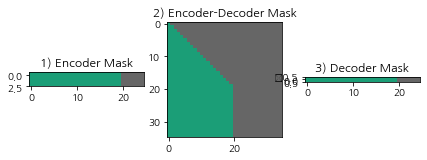

In [31]:
import matplotlib.pyplot as plt

batch, length = 20, 20
src_padding = 5
tgt_padding = 15




src_pad = tf.zeros(shape=(batch, src_padding))
tgt_pad = tf.zeros(shape=(batch, tgt_padding))

sample_data = tf.ones(shape=(batch, length))

sample_src = tf.concat([sample_data, src_pad], axis=-1)
sample_tgt = tf.concat([sample_data, tgt_pad], axis=-1)

enc_mask, dec_enc_mask, dec_mask = \
generate_masks(sample_src, sample_tgt)

fig = plt.figure(figsize=(7, 7))

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.set_title('1) Encoder Mask')
ax2.set_title('2) Encoder-Decoder Mask')
ax3.set_title('3) Decoder Mask')

ax1.imshow(enc_mask[:3, 0, 0].numpy(), cmap='Dark2')
ax2.imshow(dec_enc_mask[0, 0].numpy(), cmap='Dark2')
ax3.imshow(dec_mask[0, 0].numpy(), cmap='Dark2')

plt.show()

Ï≤´ Î≤àÏß∏ ÎßàÏä§ÌÅ¨Îäî Í∞Å Î∞∞Ïπò Î≥ÑÎ°ú Îç∞Ïù¥ÌÑ∞Ïùò Íº¨Î¶¨ Î∂ÄÎ∂ÑÏùÑ Masking ÌïòÎäî ÌòïÌÉúÏûÑÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§. ÎÇØÏÑ† Î∂ÄÎ∂ÑÏùÄ Îëê Î≤àÏß∏ÏôÄ ÏÑ∏ Î≤àÏß∏Ïùò DecoderÍ∞Ä Ïó∞Í¥ÄÎêú ÎßàÏä§ÌÅ¨Ïù∏Îç∞‚Ä¶ Ïù¥Í≤ÉÏù¥ Î∞îÎ°ú Causality MaskÏôÄ Padding MaskÎ•º Í≤∞Ìï©Ìïú ÌòïÌÉúÏûÖÎãàÎã§! ÏûêÍ∏∞ ÌöåÍ∑ÄÏ†ÅÏù∏ ÌäπÏÑ±ÏùÑ ÏÇ¥Î¶¨Í∏∞ ÏúÑÌï¥ Masked Multi-Head AttentionÏóêÏÑú Ïù∏Í≥º Í¥ÄÍ≥Ñ ÎßàÏä§ÌÇπÏùÑ ÌñàÎçò Í≤ÉÏùÑ Í∏∞ÏñµÌïòÏãúÏ£†? Ïù∏Í≥º Í¥ÄÍ≥ÑÎ•º Í∞ÄÎ¶¨Îäî Í≤ÉÎèÑ Ï§ëÏöîÌïòÏßÄÎßå Decoder Ïó≠Ïãú

Îòê, Ìä∏ÎûúÏä§Ìè¨Î®∏Îäî Í≥†Ï†ïÎêú Learning RateÎ•º ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏïòÏóàÏ£†! 

In [68]:
class LearningRateScheduler(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(LearningRateScheduler, self).__init__()
        self.d_model = d_model
        self.warmup_steps = warmup_steps
    
    def __call__(self, step):
        arg1 = step ** -0.5
        arg2 = step * (self.warmup_steps ** -1.5)
        
        return (self.d_model ** -0.5) * tf.math.minimum(arg1, arg2)
###
##learning_rate = LearningRateScheduler(512)
#optimizer = tf.keras.optimizers.Adam(learning_rate,beta_2=0.98,epsilon=1e-9)
###
print("Ïäù=3")

Ïäù=3


### **Step 4. ÌõàÎ†®ÌïòÍ∏∞**

---

ÏïûÏÑú ÌïÑÏöîÌïú Í≤ÉÎì§ÏùÑ Î™®Îëê Ï†ïÏùòÌñàÍ∏∞ ÎïåÎ¨∏Ïóê Ïö∞Î¶¨Îäî ÌõàÎ†®Îßå ÌïòÎ©¥ Îê©ÎãàÎã§! ÏïÑÎûò Í≥ºÏ†ïÏùÑ Ï∞®Í∑ºÏ∞®Í∑º Îî∞ÎùºÍ∞ÄÎ©∞ Î™®Îç∏ÏùÑ ÌõàÎ†®ÌïòÍ≥†,¬†**ÏòàÎ¨∏Ïóê ÎåÄÌïú Î©ãÏßÑ Î≤àÏó≠**ÏùÑ Ï†úÏ∂úÌïòÏÑ∏Ïöî!

1. **2 Layer**Î•º Í∞ÄÏßÄÎäî¬†**`Transformer`**Î•º ÏÑ†Ïñ∏ÌïòÏÑ∏Ïöî.(ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Îäî ÏûêÏú†Î°≠Í≤å Ï°∞Ï†àÌï©ÎãàÎã§.)

In [69]:
transformer = Transformer(
    n_layers = 4,
    d_model = 512,
    n_heads = 8,
    d_ff = 2048,
    src_vocab_size=6000,
    tgt_vocab_size=6000,
    pos_len=50,
    dropout = 0.3
)


2. ÎÖºÎ¨∏ÏóêÏÑú ÏÇ¨Ïö©Ìïú Í≤ÉÍ≥º ÎèôÏùºÌïú¬†**Learning Rate Scheduler**Î•º ÏÑ†Ïñ∏ÌïòÍ≥†, Ïù¥Î•º Ìè¨Ìï®ÌïòÎäî¬†**Adam Optimizer**Î•º ÏÑ†Ïñ∏ÌïòÏÑ∏Ïöî. (OptimizerÏùò ÌååÎùºÎØ∏ÌÑ∞ Ïó≠Ïãú ÎÖºÎ¨∏Í≥º ÎèôÏùºÌïòÍ≤å ÏÑ§Ï†ïÌï©ÎãàÎã§.)

In [70]:
#learning_rate =0.0005
learning_rate = LearningRateScheduler(512)
optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-09, 
    name='Adam'
)

3. **Loss Ìï®ÏàòÎ•º Ï†ïÏùò**ÌïòÏÑ∏Ïöî.Sequence-to-sequence Î™®Îç∏ÏóêÏÑú ÏÇ¨Ïö©ÌñàÎçò LossÏôÄ Ïú†ÏÇ¨ÌïòÎêò,¬†**Masking ÎêòÏßÄ ÏïäÏùÄ ÏûÖÎ†•Ïùò Í∞úÏàòÎ°ú Scaling**ÌïòÎäî Í≥ºÏ†ïÏùÑ Ï∂îÍ∞ÄÌï©ÎãàÎã§. (Ìä∏ÎûúÏä§Ìè¨Î®∏Í∞Ä Î™®Îì† ÏûÖÎ†•Ïóê ÎåÄÌïú LossÎ•º Ìïú Î≤àÏóê Íµ¨ÌïòÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.)

In [71]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    # Masking ÎêòÏßÄ ÏïäÏùÄ ÏûÖÎ†•Ïùò Í∞úÏàòÎ°ú ScalingÌïòÎäî Í≥ºÏ†ï
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    
    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

4. **`train_step`¬†Ìï®Ïàò**Î•º Ï†ïÏùòÌïòÏÑ∏Ïöî.**ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Ïóê ÏïåÎßûÏùÄ MaskÎ•º ÏÉùÏÑ±**ÌïòÍ≥†, Ïù¥Î•º Î™®Îç∏Ïóê Ï†ÑÎã¨ÌïòÏó¨ Ïó∞ÏÇ∞ÏóêÏÑú ÏÇ¨Ïö©Ìï† Ïàò ÏûàÍ≤å Ìï©ÎãàÎã§.

https://www.tensorflow.org/guide/keras/customizing_what_happens_in_fit?hl=ko Ï∞∏Ï°∞

In [72]:
# Train Step Ìï®Ïàò Ï†ïÏùò

@tf.function()
def train_step(src, tgt, model, optimizer):
    gold = tgt[:, 1:]

    enc_mask, dec_enc_mask, dec_mask = generate_masks(src, tgt)

    # Í≥ÑÏÇ∞Îêú lossÏóê tf.GradientTape()Î•º Ï†ÅÏö©Ìï¥ ÌïôÏäµÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.
    with tf.GradientTape() as tape:
        predictions, enc_attns, dec_attns, dec_enc_attns = \
        model(src, tgt, enc_mask, dec_enc_mask, dec_mask)
        loss = loss_function(gold, predictions[:, :-1])

    # ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú optimizer.apply_gradients()Í∞Ä ÏÇ¨Ïö©Îê©ÎãàÎã§.
    gradients = tape.gradient(loss, model.trainable_variables)    
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    return loss, enc_attns, dec_attns, dec_enc_attns

5. **ÌïôÏäµÏùÑ ÏßÑÌñâ**Ìï©ÎãàÎã§.**Îß§ Epoch ÎßàÎã§ Ï†úÏãúÎêú ÏòàÎ¨∏Ïóê ÎåÄÌïú Î≤àÏó≠ÏùÑ ÏÉùÏÑ±**ÌïòÍ≥†, Î©ãÏßÑ Î≤àÏó≠Ïù¥ ÏÉùÏÑ±ÎêòÎ©¥ Í∑∏ÎïåÏùò¬†**ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ÏôÄ ÏÉùÏÑ±Îêú Î≤àÏó≠ÏùÑ Ï†úÏ∂ú**ÌïòÏÑ∏Ïöî!

### **ÏòàÎ¨∏**

```
1. Ïò§Î∞îÎßàÎäî ÎåÄÌÜµÎ†πÏù¥Îã§.
2. ÏãúÎØºÎì§ÏùÄ ÎèÑÏãú ÏÜçÏóê ÏÇ∞Îã§.
3. Ïª§ÌîºÎäî ÌïÑÏöî ÏóÜÎã§.
4. ÏùºÍ≥± Î™ÖÏùò ÏÇ¨ÎßùÏûêÍ∞Ä Î∞úÏÉùÌñàÎã§.

```

### **Í≤∞Í≥º(output)**

```
Translations
> 1. obama is the president elect .
> 2. they are in the city .
> 3. they don t need to be a lot of drink .
> 4. seven other people have been killed in the attacks .

Hyperparameters
> n_layers: 2
> d_model: 512
> n_heads: 8
> d_ff: 2048
> dropout: 0.3

Training Parameters
> Warmup Steps: 4000
> Batch Size: 64
> Epoch At: 5

```

Î≤àÏó≠ ÏÉùÏÑ±ÏóêÎäî ÏïÑÎûò ÏÜåÏä§Î•º ÏÇ¨Ïö©ÌïòÏãúÍ∏∏ Î∞îÎûçÎãàÎã§!

In [73]:
checkpoint_path = "./checkpoints/train"

ckpt = tf.train.Checkpoint(transformer=transformer,
                           optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print('Latest checkpoint restored!!')

In [74]:
# Attention ÏãúÍ∞ÅÌôî Ìï®Ïàò

def visualize_attention(src, tgt, enc_attns, dec_attns, dec_enc_attns):
    def draw(data, ax, x="auto", y="auto"):
        import seaborn
        seaborn.heatmap(data,
                        square=True,
                        vmin=0.0, vmax=1.0,
                        cbar=False, ax=ax,
                        xticklabels=x,
                        yticklabels=y)

    for layer in range(0, 2, 1):
        fig, axs = plt.subplots(1, 4, figsize=(20, 10))
        print("Encoder Layer", layer + 1)
        for h in range(4):
            draw(enc_attns[layer][0, h, :len(src), :len(src)], axs[h], src, src)
        plt.show()

    for layer in range(0, 2, 1):
        fig, axs = plt.subplots(1, 4, figsize=(20, 10))
        print("Decoder Self Layer", layer+1)
        for h in range(4):
            draw(dec_attns[layer][0, h, :len(tgt), :len(tgt)], axs[h], tgt, tgt)
        plt.show()

        print("Decoder Src Layer", layer+1)
        fig, axs = plt.subplots(1, 4, figsize=(20, 10))
        for h in range(4):
            draw(dec_enc_attns[layer][0, h, :len(tgt), :len(src)], axs[h], src, tgt)
        plt.show()

In [103]:
# Î≤àÏó≠ ÏÉùÏÑ± Ìï®Ïàò

def evaluate(sentence, model, src_tokenizer, tgt_tokenizer):
    sentence = preprocess_sentence(sentence)

    pieces = src_tokenizer.encode_as_pieces(sentence)
    tokens = src_tokenizer.encode_as_ids(sentence)

    _input = tf.keras.preprocessing.sequence.pad_sequences([tokens],
                                                           maxlen=enc_train.shape[-1],
                                                           padding='post')

    ids = []
    output = tf.expand_dims([tgt_tokenizer.bos_id()], 0)
    for i in range(dec_train.shape[-1]):
        enc_padding_mask, combined_mask, dec_padding_mask = \
        generate_masks(_input, output)
        
        print("enc_mask", enc_padding_mask,"\n")
        print("com_mask", combined_mask,"\n")
        print("dec_mask", dec_padding_mask,"\n")
        
        
        predictions, enc_attns, dec_attns, dec_enc_attns =\
        model(_input,
              output,
              enc_padding_mask,
              combined_mask,
              dec_padding_mask)

        predicted_id = \
        tf.argmax(tf.math.softmax(predictions, axis=-1)[0, -1]).numpy().item()

        if tgt_tokenizer.eos_id() == predicted_id:
            result = tgt_tokenizer.decode_ids(ids)
            return pieces, result, enc_attns, dec_attns, dec_enc_attns

        ids.append(predicted_id)
        output = tf.concat([output, tf.expand_dims([predicted_id], 0)], axis=-1)
        
    result = tgt_tokenizer.decode_ids(ids)

    return pieces, result, enc_attns, dec_attns, dec_enc_attns

### ÏΩîÎìú Î∂ÑÌï¥ÌïòÍ∏∞


In [76]:
sentence = 'Ïò§Î∞îÎßàÎäî ÎåÄÌÜµÎ†πÏù¥Îã§.'
sentence = preprocess_sentence(sentence)

pieces = ko_tokenizer.encode_as_pieces(sentence)
tokens = en_tokenizer.encode_as_ids(sentence)

In [77]:
pieces

['‚ñÅÏò§Î∞îÎßà', 'Îäî', '‚ñÅÎåÄÌÜµÎ†πÏù¥', 'Îã§', '‚ñÅ', '.']

In [78]:
tokens

[1, 4, 3, 4, 3, 7, 2]

In [79]:
_input = tf.keras.preprocessing.sequence.pad_sequences([tokens],
                                                           maxlen=enc_train.shape[-1],
                                                           padding='post')

In [80]:
_input.shape

(1, 50)

In [81]:
enc_train.shape[-1]

50

In [82]:
en_tokenizer.bos_id()

1

In [83]:
ids = []
output = tf.expand_dims([en_tokenizer.bos_id()], 0)
output

<tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[1]], dtype=int32)>

In [85]:
# Î≤àÏó≠ ÏÉùÏÑ± Î∞è Attention ÏãúÍ∞ÅÌôî Í≤∞Ìï©

def translate(sentence, model, src_tokenizer, tgt_tokenizer, plot_attention=False):
    pieces, result, enc_attns, dec_attns, dec_enc_attns = \
    evaluate(sentence, model, src_tokenizer, tgt_tokenizer)

    print('Input: %s' % (sentence))
    print('Predicted translation: {}'.format(result))

    if plot_attention:
        visualize_attention(pieces, result.split(), enc_attns, dec_attns, dec_enc_attns)

**`translate()`**¬†Ìï®ÏàòÏùò¬†**`plot_attention`**¬†Î≥ÄÏàòÎ•º¬†**`True`**¬†Î°ú Ï£ºÎ©¥¬†**Î≤àÏó≠ Í≤∞Í≥ºÏóê ÎåÄÌïú Attention MapÏùÑ ÏãúÍ∞ÅÌôî**¬†Ìï¥Î≥º Ïàò ÏûàÏäµÎãàÎã§.

üí° Ïù¥Î≤à ÌîÑÎ°úÏ†ùÌä∏ÏóêÏÑú Ï†úÏãúÌïú ÏòàÎ¨∏ÏùÄ¬†**Seq2seqÏúºÎ°ú Î≤àÏó≠Í∏∞ ÎßåÎì§Í∏∞**Ïùò ÏòàÎ¨∏Í≥º ÎèôÏùºÌï©ÎãàÎã§. Seq2seqÍ≥º TransformerÎ°ú ÎßåÎì† Îëê Î≤àÏó≠Í∏∞Ïùò ÏÑ±Îä•ÏùÑ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Ï°∞Ï†ï Îì± Îã§ÏñëÌïú Ïó∞Íµ¨Ìï¥Î≥¥ÏãúÎ©¥ ÌïôÏäµÏóê ÎèÑÏõÄÏù¥ ÎêòÏã§ Í±∞ÏòàÏöî!

ÎßàÏßÄÎßâÏúºÎ°ú, ÌïôÏäµÏùò Ï†Ñ Í≥ºÏ†ïÏùÑ Íµ¨ÌòÑÌïú ÏΩîÎìúÎ•º Ï≤®Î∂ÄÌï©ÎãàÎã§. Íµ¨ÌòÑÍ≥ºÏ†ïÏóê Ï∞∏Í≥†Ìï¥ Ï£ºÏÑ∏Ïöî. ÏàòÍ≥†ÌïòÏÖ®ÏäµÎãàÎã§!!

In [86]:
enc_train.shape

(61747, 50)

In [87]:
dec_train.shape

(61747, 50)

In [91]:
from tqdm import tqdm_notebook 

BATCH_SIZE = 32
EPOCHS = 10

examples = [
            "Ïò§Î∞îÎßàÎäî ÎåÄÌÜµÎ†πÏù¥Îã§.",
            "ÏãúÎØºÎì§ÏùÄ ÎèÑÏãú ÏÜçÏóê ÏÇ∞Îã§.",
            "Ïª§ÌîºÎäî ÌïÑÏöî ÏóÜÎã§.",
            "ÏùºÍ≥± Î™ÖÏùò ÏÇ¨ÎßùÏûêÍ∞Ä Î∞úÏÉùÌñàÎã§."
]



for epoch in range(EPOCHS):
    total_loss = 0

    idx_list = list(range(0, enc_train.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm_notebook(idx_list)

    for (batch, idx) in enumerate(t):
        batch_loss, enc_attns, dec_attns, dec_enc_attns = \
        train_step(enc_train[idx:idx+BATCH_SIZE],
                    dec_train[idx:idx+BATCH_SIZE],
                    transformer,
                    optimizer)

        total_loss += batch_loss
        
        t.set_description_str('Epoch %2d' % (epoch + 1))
        t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))
        
        if (epoch + 1) % 5 == 0:
            ckpt_save_path = ckpt_manager.save()
            #print(f'Saving checkpoint for epoch {epoch+1} at {ckpt_save_path}')



/home/aiffel-dj60/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/1930 [00:00<?, ?it/s]

  0%|          | 0/1930 [00:00<?, ?it/s]

  0%|          | 0/1930 [00:00<?, ?it/s]

  0%|          | 0/1930 [00:00<?, ?it/s]

  0%|          | 0/1930 [00:00<?, ?it/s]

  0%|          | 0/1930 [00:00<?, ?it/s]

  0%|          | 0/1930 [00:00<?, ?it/s]

  0%|          | 0/1930 [00:00<?, ?it/s]

  0%|          | 0/1930 [00:00<?, ?it/s]

  0%|          | 0/1930 [00:00<?, ?it/s]

enc_mask tf.Tensor(
[[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
    1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
    1. 1. 1. 1. 1. 1.]]]], shape=(1, 1, 1, 50), dtype=float32) 

com_mask tf.Tensor([[[[0.]]]], shape=(1, 1, 1, 1), dtype=float32) 

dec_mask tf.Tensor(
[[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
    1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
    1. 1. 1. 1. 1. 1.]]]], shape=(1, 1, 1, 50), dtype=float32) 

enc_mask tf.Tensor(
[[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
    1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
    1. 1. 1. 1. 1. 1.]]]], shape=(1, 1, 1, 50), dtype=float32) 

com_mask tf.Tensor(
[[[[0. 1.]
   [0. 0.]]]], shape=(1, 1, 2, 2), dtype=float32) 

dec_mask tf.Tensor(
[[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
    1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
    1. 1. 1. 1

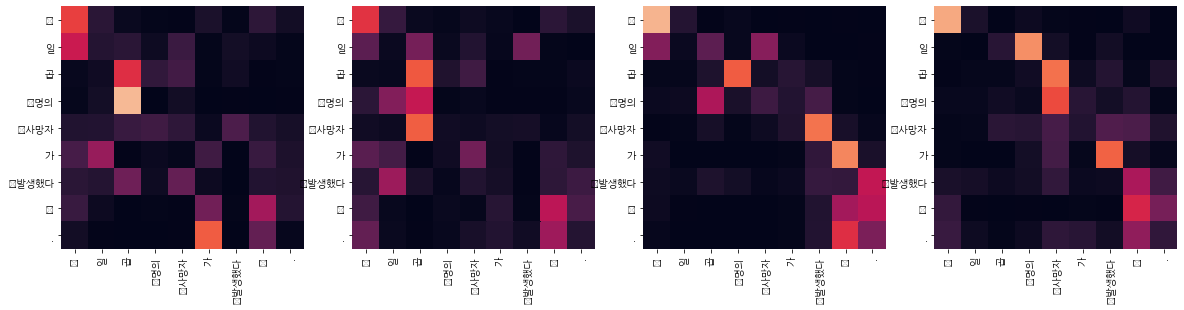

Encoder Layer 2


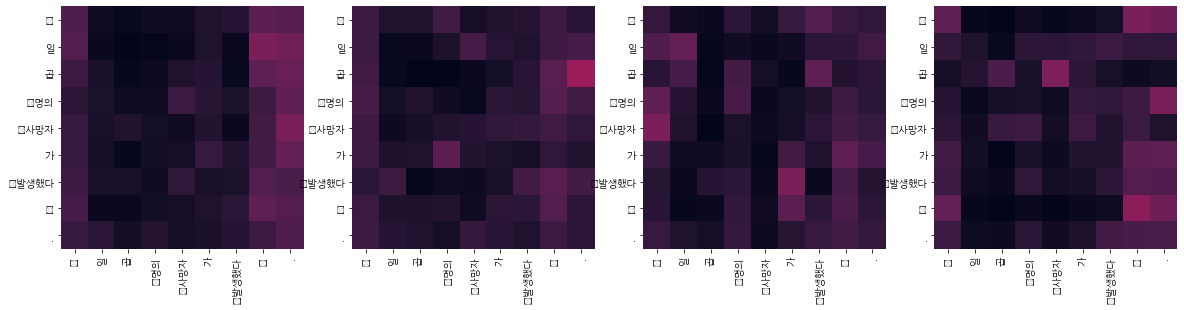

Decoder Self Layer 1


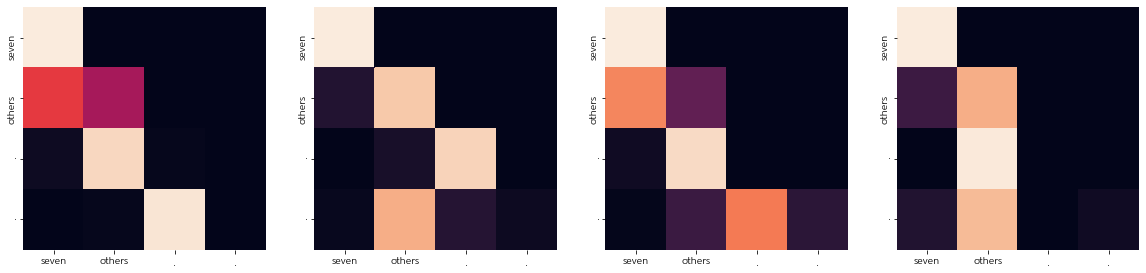

Decoder Src Layer 1


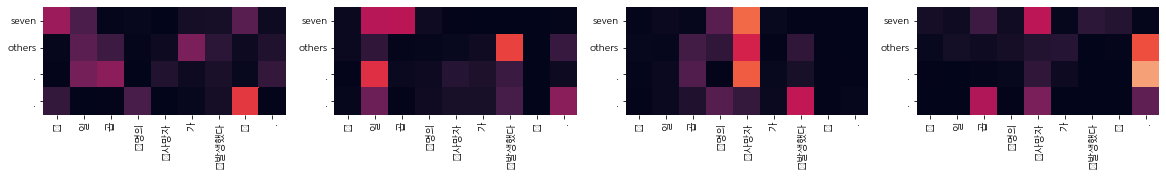

Decoder Self Layer 2


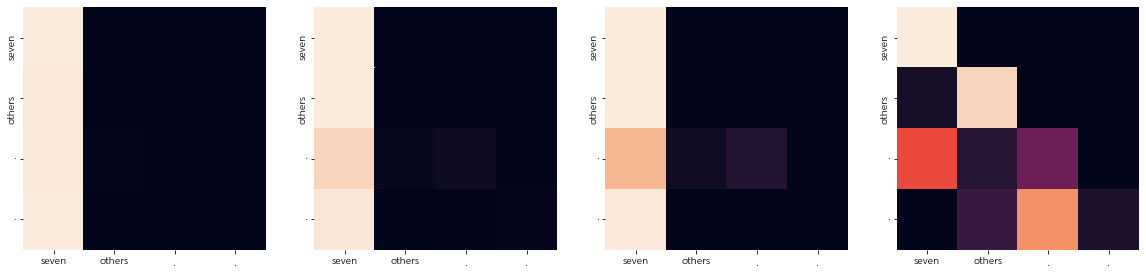

Decoder Src Layer 2


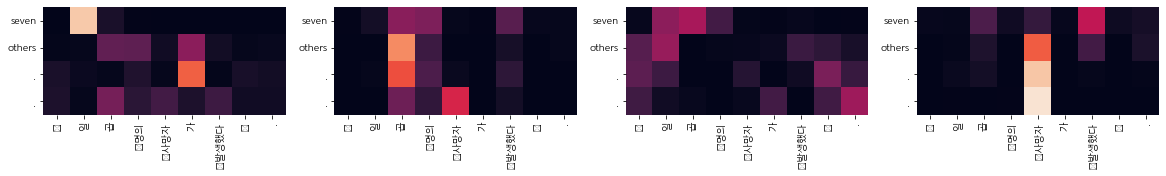

In [93]:
sentence = 'ÏùºÍ≥± Î™ÖÏùò ÏÇ¨ÎßùÏûêÍ∞Ä Î∞úÏÉùÌñàÎã§.'
#evaluate(sentence, transformer, ko_tokenizer, en_tokenizer,True)
translate('ÏùºÍ≥± Î™ÖÏùò ÏÇ¨ÎßùÏûêÍ∞Ä Î∞úÏÉùÌñàÎã§.',transformer, ko_tokenizer, en_tokenizer,True)

enc_mask tf.Tensor(
[[[[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
    1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
    1. 1. 1. 1. 1. 1.]]]], shape=(1, 1, 1, 50), dtype=float32) 

com_mask tf.Tensor([[[[0.]]]], shape=(1, 1, 1, 1), dtype=float32) 

dec_mask tf.Tensor(
[[[[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
    1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
    1. 1. 1. 1. 1. 1.]]]], shape=(1, 1, 1, 50), dtype=float32) 

enc_mask tf.Tensor(
[[[[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
    1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
    1. 1. 1. 1. 1. 1.]]]], shape=(1, 1, 1, 50), dtype=float32) 

com_mask tf.Tensor(
[[[[0. 1.]
   [0. 0.]]]], shape=(1, 1, 2, 2), dtype=float32) 

dec_mask tf.Tensor(
[[[[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
    1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
    1. 1. 1. 1

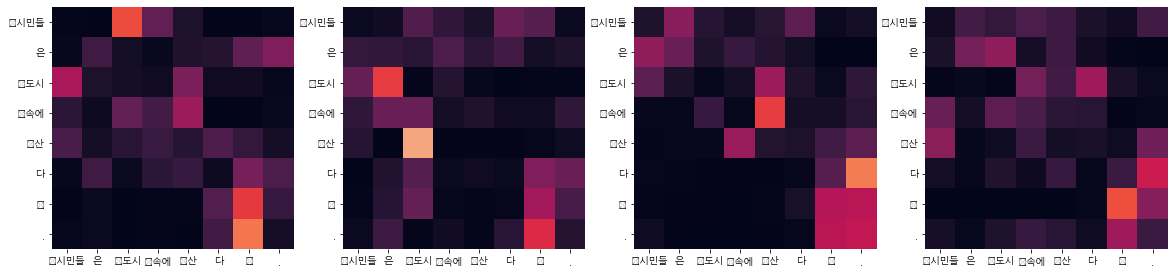

Encoder Layer 2


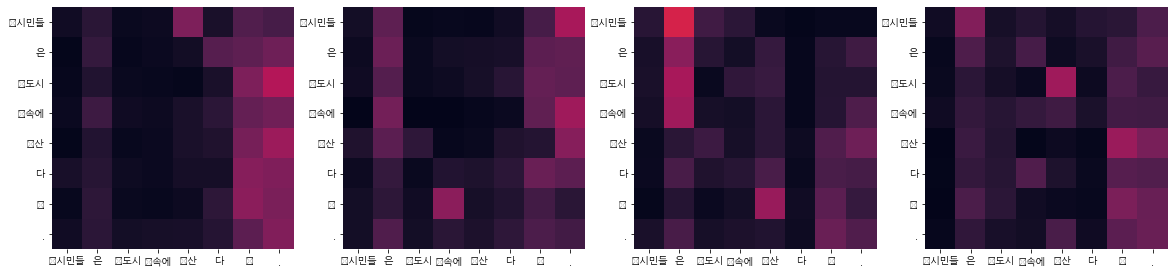

Decoder Self Layer 1


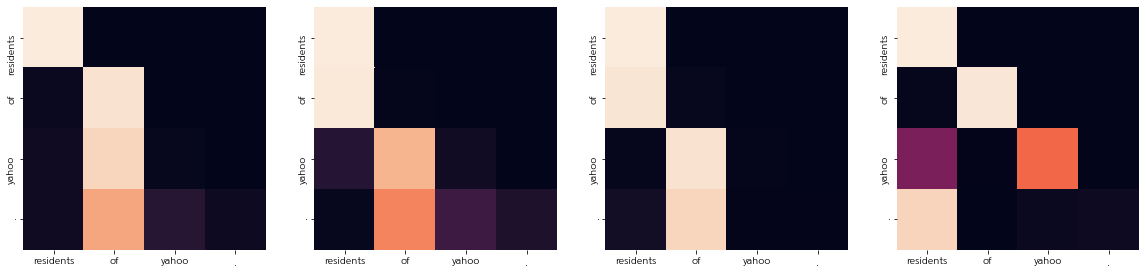

Decoder Src Layer 1


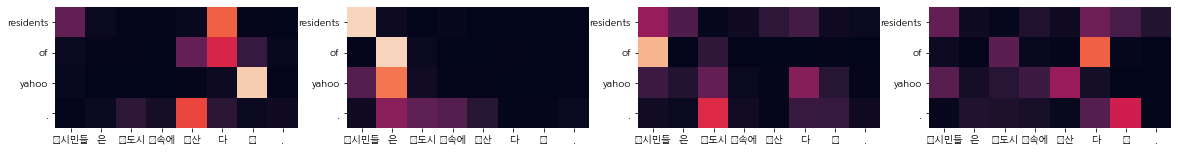

Decoder Self Layer 2


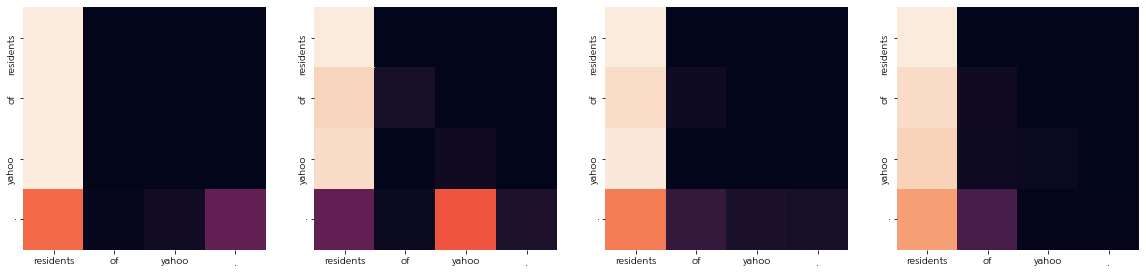

Decoder Src Layer 2


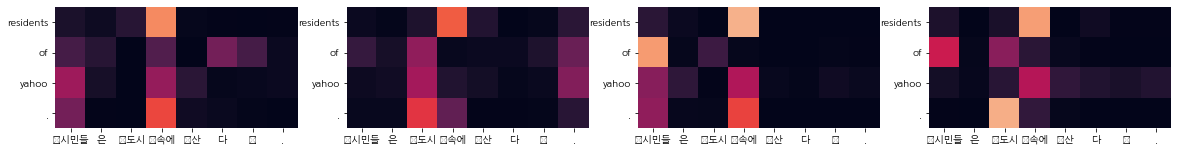

In [104]:
translate( "ÏãúÎØºÎì§ÏùÄ ÎèÑÏãú ÏÜçÏóê ÏÇ∞Îã§.",transformer, ko_tokenizer, en_tokenizer,True)

Input: Ïª§ÌîºÎäî ÌïÑÏöî ÏóÜÎã§.
Predicted translation: but the quality is not needed .
Encoder Layer 1


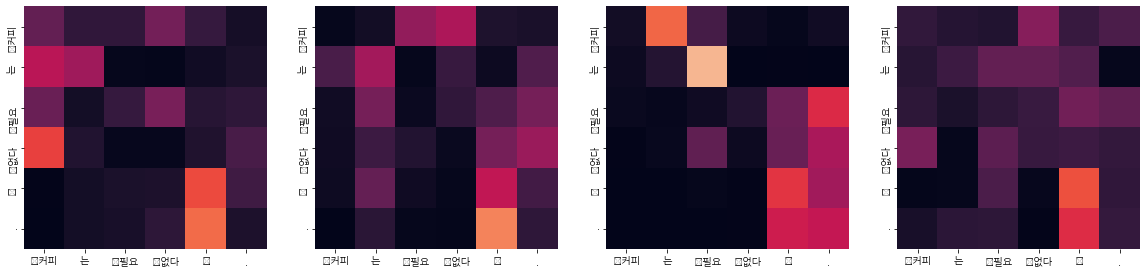

Encoder Layer 2


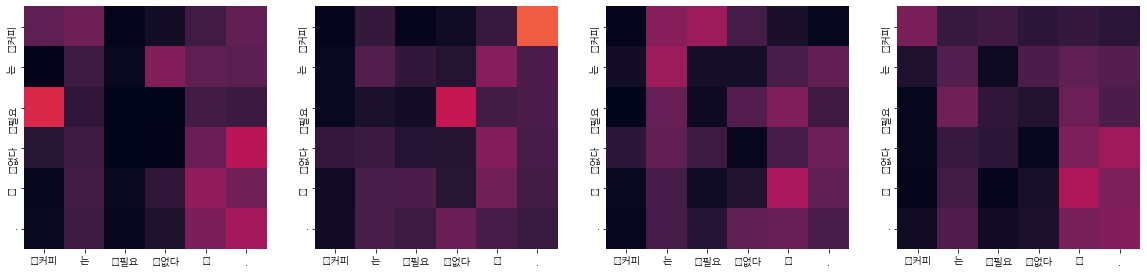

Decoder Self Layer 1


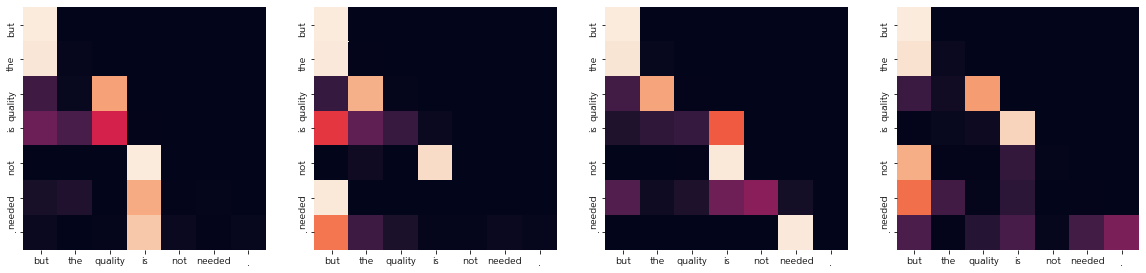

Decoder Src Layer 1


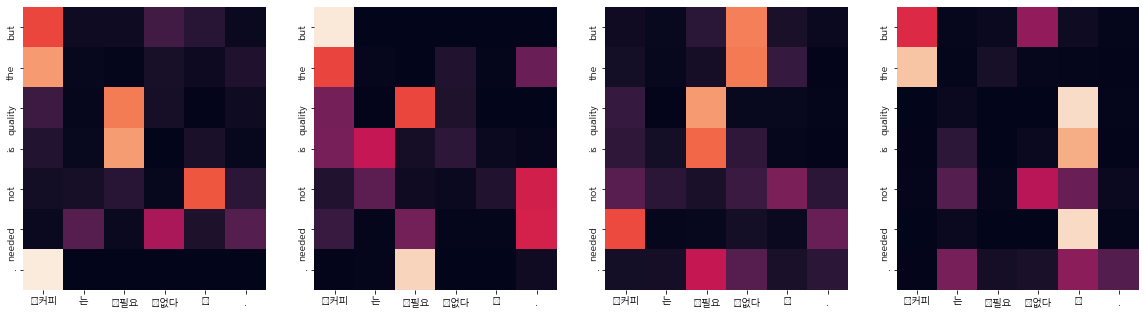

Decoder Self Layer 2


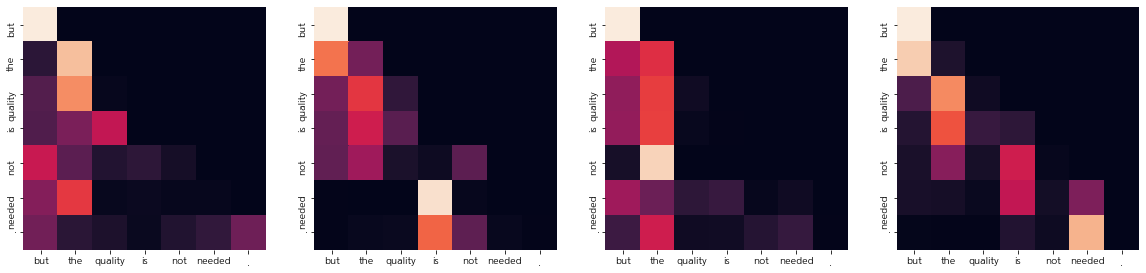

Decoder Src Layer 2


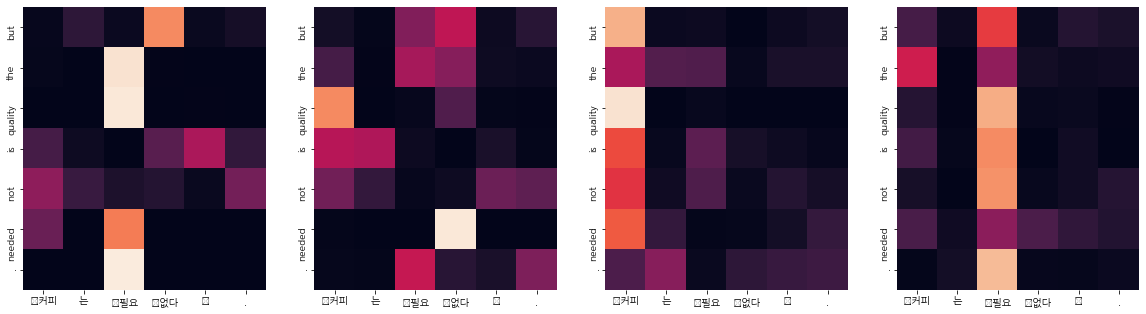

In [96]:
translate( "Ïª§ÌîºÎäî ÌïÑÏöî ÏóÜÎã§.",transformer, ko_tokenizer, en_tokenizer,True)

Input: Ïò§Î∞îÎßàÎäî ÎåÄÌÜµÎ†πÏù¥Îã§.
Predicted translation: president barack obama continues to take a different view
Encoder Layer 1


Encoder Layer 2


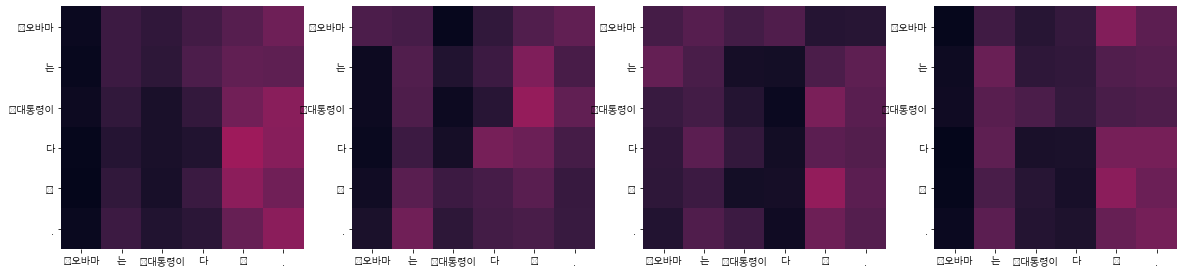

Decoder Self Layer 1


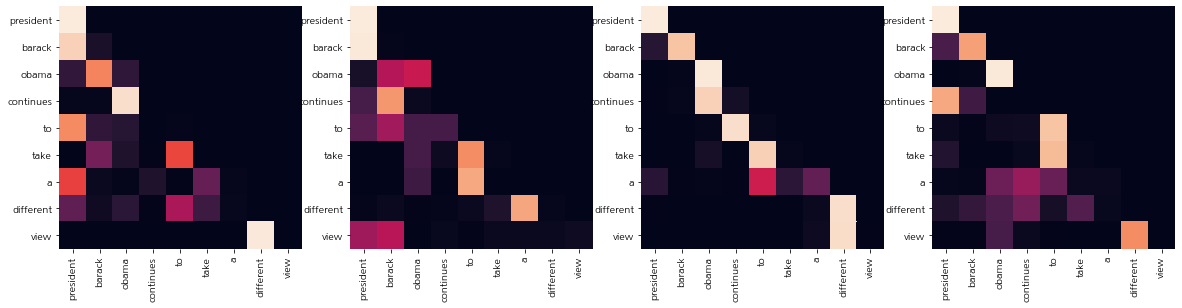

Decoder Src Layer 1


Decoder Self Layer 2


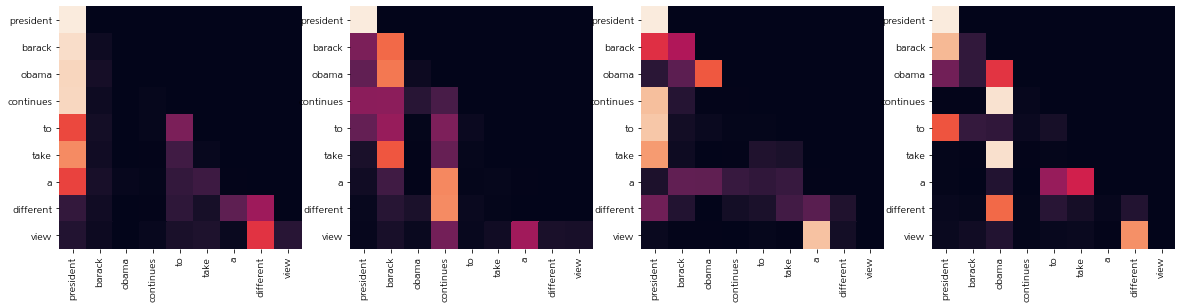

Decoder Src Layer 2


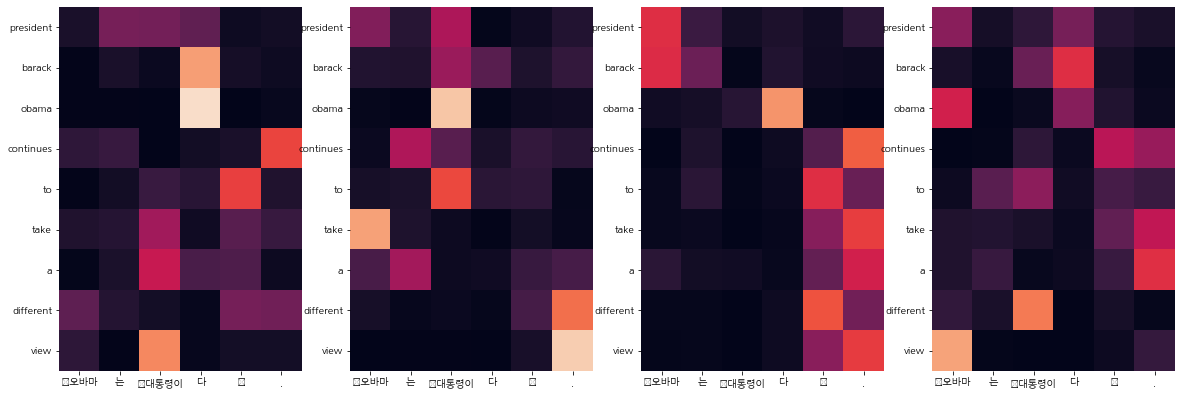

In [97]:
translate("Ïò§Î∞îÎßàÎäî ÎåÄÌÜµÎ†πÏù¥Îã§.",transformer, ko_tokenizer, en_tokenizer,True)

# Î£®Î∏åÎ¶≠

ÏïÑÎûòÏùò Í∏∞Ï§ÄÏùÑ Î∞îÌÉïÏúºÎ°ú ÌîÑÎ°úÏ†ùÌä∏Î•º ÌèâÍ∞ÄÌï©ÎãàÎã§.    

ÌèâÍ∞ÄÎ¨∏Ìï≠    
ÏÉÅÏÑ∏Í∏∞Ï§Ä    


**1. Î≤àÏó≠Í∏∞ Î™®Îç∏ ÌïôÏäµÏóê ÌïÑÏöîÌïú ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Í∞Ä Ïûò Ïù¥Î£®Ïñ¥Ï°åÎã§.**      
- Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú, SentencePieceÎ•º ÌôúÏö©Ìïú ÌÜ†ÌÅ∞Ìôî Î∞è Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨Ï∂ïÏùò Í≥ºÏ†ïÏù¥ ÏßÄÏãúÎåÄÎ°ú ÏßÑÌñâÎêòÏóàÎã§.

**2. Transformer Î≤àÏó≠Í∏∞ Î™®Îç∏Ïù¥ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú Íµ¨ÎèôÎêúÎã§.**      
- Transformer Î™®Îç∏Ïùò ÌïôÏäµÍ≥º Ï∂îÎ°† Í≥ºÏ†ïÏù¥ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú ÏßÑÌñâÎêòÏñ¥, Ìïú-ÏòÅ Î≤àÏó≠Í∏∞Îä•Ïù¥ Ï†ïÏÉÅ ÎèôÏûëÌïúÎã§.       

**3. ÌÖåÏä§Ìä∏ Í≤∞Í≥º ÏùòÎØ∏Í∞Ä ÌÜµÌïòÎäî ÏàòÏ§ÄÏùò Î≤àÏó≠Î¨∏Ïù¥ ÏÉùÏÑ±ÎêòÏóàÎã§.**          
- Ï†úÏãúÎêú Î¨∏Ïû•Ïóê ÎåÄÌïú Í∑∏Îü¥ÎìØÌïú ÏòÅÏñ¥ Î≤àÏó≠Î¨∏Ïù¥ ÏÉùÏÑ±ÎêòÎ©∞, ÏãúÍ∞ÅÌôîÎêú Attention MapÏúºÎ°ú Í≤∞Í≥ºÎ•º Îí∑Î∞õÏπ®ÌïúÎã§.      


Ï∞∏Ï°∞ ÏÇ¨Ïù¥Ìä∏
https://www.tensorflow.org/tutorials/text/transformer

https://wikidocs.net/31379

https://deepestdocs.readthedocs.io/en/latest/005_sequence_processing/0050/